In [21]:
using IonSim

IonSim now supports mixed-species LinearChains and LinearChains with an arbitrarily defined mode structure.

# Mixed Species Chains

In [22]:
c = Ca40()
b = Be9()
y = Yb171()
chain = LinearChain(
    ions=[c, b, b, c, y, y, c, c, c],
    comfrequencies=(x=10e6,y=10e6,z=0.1e6), 
    selectedmodes=(;x=[:], z=[1, 3:4])  # Note: selectedmodes now supports slicing
)
# Note for multispecies chains, there is no longer a unique COM mode in each direction, so `comfrequencies`
# is a misnomer. In this case, it corresponds to the lowest (highest) frequency normal mode in the (axial) radial direction.

┌ Warning: Some ions point to the same thing. Making copies.
└ @ IonSim ~/Desktop/IonSim/IonSim.jl/src/iontraps.jl:94


LinearChain(9 ions)

The resulting normal mode structure can be viewed with

In [23]:
fnm = full_normal_mode_description(chain)

(x = [(1.0000000000000237e7, [0.0007119475008959854, 0.8255173352009326, 0.5643753160525721, 0.0010571876117616227, 7.650355014664135e-5, 2.5924730919445775e-5, 2.5541401058872332e-5, 1.3123100343816892e-5, 6.996875002388734e-6]), (9.972558377950067e6, [0.00033925275988677206, 0.5643761959592976, -0.825516723070051, -0.001236657411823069, -6.605333571664175e-5, -1.7822948987162317e-5, -1.4775385214364394e-5, -6.599358860531067e-6, -3.105566859712141e-6]), (2.252421822720265e6, [0.011792947923271556, -2.1538646409177683e-5, -3.8967628422141576e-5, 0.011394041739067814, 0.000554921892114456, 0.0024864677846236087, 0.2644814538829269, 0.5157945987632471, 0.8146963251347228]), (2.247073870286598e6, [0.9998126784242941, -0.0007814623085246517, -0.0001445728638549856, 0.014180795066082495, 0.00020099035430593012, 6.270231969141804e-5, 0.0006043130359806498, -0.003482218009480868, -0.012662786560074775]), (2.2373173576828623e6, [0.005669781422256578, 8.492418081691364e-6, 5.404772884574222e-5

Which is a lot to take in, we can break it down by spatial axis and look at a single mode:

In [26]:
fnm.x[1]

(1.0000000000000237e7, [0.0007119475008959854, 0.8255173352009326, 0.5643753160525721, 0.0010571876117616227, 7.650355014664135e-5, 2.5924730919445775e-5, 2.5541401058872332e-5, 1.3123100343816892e-5, 6.996875002388734e-6])

or:

In [27]:
xm = xmodes(chain)

9-element Vector{VibrationalMode}:
 VibrationalMode(ν=1.0e7, axis=x̂, N=10)
 VibrationalMode(ν=9.973e6, axis=x̂, N=10)
 VibrationalMode(ν=2.252e6, axis=x̂, N=10)
 VibrationalMode(ν=2.247e6, axis=x̂, N=10)
 VibrationalMode(ν=2.237e6, axis=x̂, N=10)
 VibrationalMode(ν=2.217e6, axis=x̂, N=10)
 VibrationalMode(ν=2.214e6, axis=x̂, N=10)
 VibrationalMode(ν=494400.0, axis=x̂, N=10)
 VibrationalMode(ν=455500.0, axis=x̂, N=10)

In [28]:
println(xm[1].ν)
println()
println(xm[1].modestructure)

1.0000000000000237e7

Real[0.0007119475008959854, 0.8255173352009326, 0.5643753160525721, 0.0010571876117616227, 7.650355014664135e-5, 2.5924730919445775e-5, 2.5541401058872332e-5, 1.3123100343816892e-5, 6.996875002388734e-6]


The positions of the ions is now available directly from the chain (and is also now reported in SI, rather than dimensionless units):

In [29]:
chain.ionpositions * 1e6  # in μm

9-element Vector{Float64}:
 -156.88865348019291
 -110.61335572652598
  -71.38179750386148
  -35.096125559196224
    0.0
   35.096125559196224
   71.38179750386148
  110.61335572652598
  156.88865348019291

# Visualization

But we provide some convenient visualization tools to help understand what's going on:

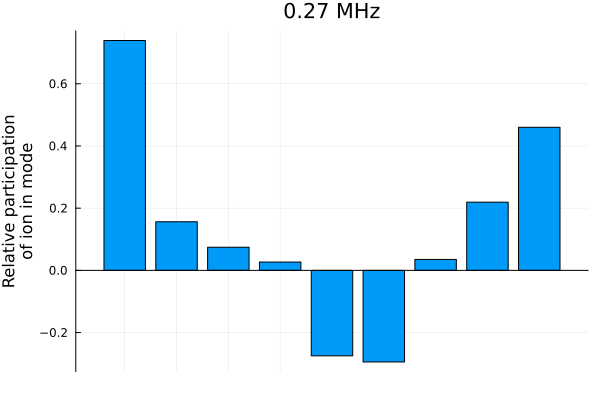

In [30]:
visualize(zmodes(chain)[2])

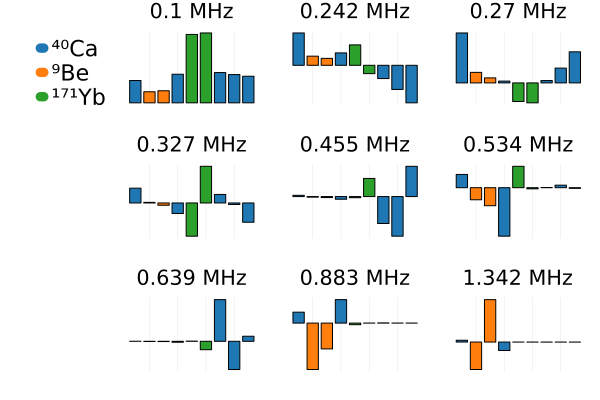

In [31]:
visualize(chain, ẑ, [:])

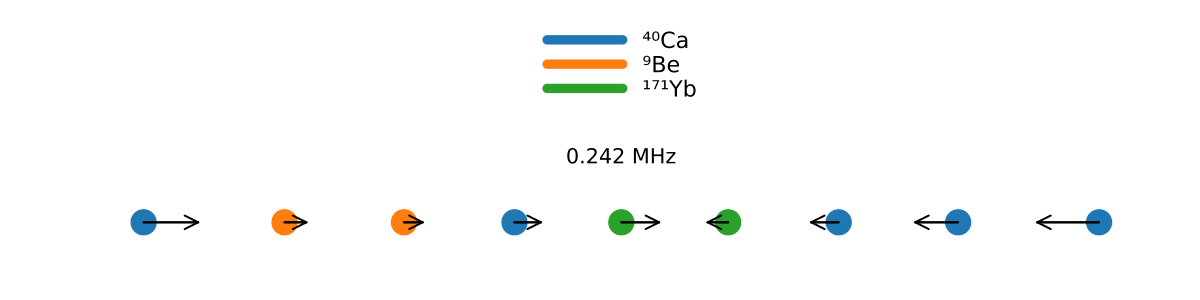

In [32]:
visualize(chain, ẑ, [2], format="circles")

Note how the ions tend towards modes where groups of identical species oscillate together. In the axial direction the force is the same on each ion, but their accelerations are different. This effect is even more pronounced in the radial directions since here the pseudopotential is also mass-dependent.

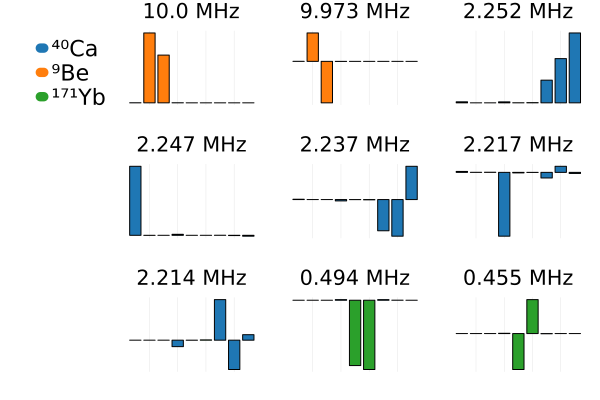

In [33]:
visualize(chain, x̂, [:])

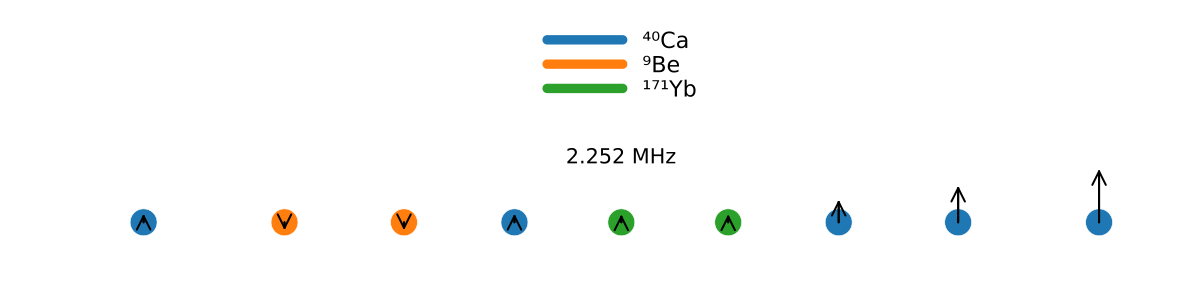

In [34]:
visualize(chain, x̂, [3], format="circles")

# Load from yaml

Instead of having IonSim calculate the normal mode structure, it can instead by provided by the user with a yaml file. For example, if the file `normal_mode.yaml` contains the following normal mode structure:

```yaml
---
x:
  - frequency: 1e6
    mode: [0.1, 0.5, 0.3, 0.8]
  - frequency: 2e6
    mode: [0.3, 0.6, 0.5, 3]
y:
  - frequency: 8e6
    mode: [1, 1, 1, 1]
ionpositions: [1,2,3,4]
```

Then it can be loaded into a LinearChain with:

In [13]:
chain = LinearChain_fromyaml(
    ions=[c, c, c, c],
    yaml="normal_mode.yaml",  
)

(x = VibrationalMode[VibrationalMode(ν=1.0e6, axis=x̂, N=10), VibrationalMode(ν=2.0e6, axis=x̂, N=10)], y = VibrationalMode[VibrationalMode(ν=8.0e6, axis=ŷ, N=10)], z = VibrationalMode[])


LinearChain(4 ions)

Note that its up to the use to enforce (or not enforce) the physicality of this structure. Of course, `full_normal_mode_description` will no longer work with `chain`

In [14]:
full_normal_mode_description(chain)

LoadError: AssertionError: This function doesn't work for user defined mode structure.

# Independent normal mode calculation

One can calculate the resulting normal modes without instantiating any ions or chains. Just give a list of masses and charges (in units of the fundamental charge of e) to `full_normal_mode_description`:

In [15]:
mass_list =    [1, 1, 1, 1, 1]
charge_list =  [2, 1, 2, 2, 1]
fnm = full_normal_mode_description(mass_list, charge_list, (x=5e6, y=5e6, z=1e6))
fnm.x

5-element Vector{Tuple{Float64, Vector{Float64}}}:
 (4.999999999995645e6, [0.6057584914661734, 0.11812621584240938, 0.5260995812418203, 0.583082596466988, 0.04834008131845957])
 (4.915916957819456e6, [0.7826412154137659, 0.032418418050697326, -0.30779630853516393, -0.5382970359893425, -0.04381218556484292])
 (4.593768092555486e6, [0.11369990346572717, -0.09498304988480277, -0.7823562826899958, 0.6025950696370188, 0.05337022738487856])
 (3.4484213161962545e6, [0.001426876536388351, -0.004880961222275375, -0.0023165314760899736, 0.084205212689081, -0.996432765458264])
 (3.0906780717857066e6, [0.0871761086968414, -0.9879016346549745, 0.12803883663451218, -0.0062968998362194235, 0.00413420902221687])

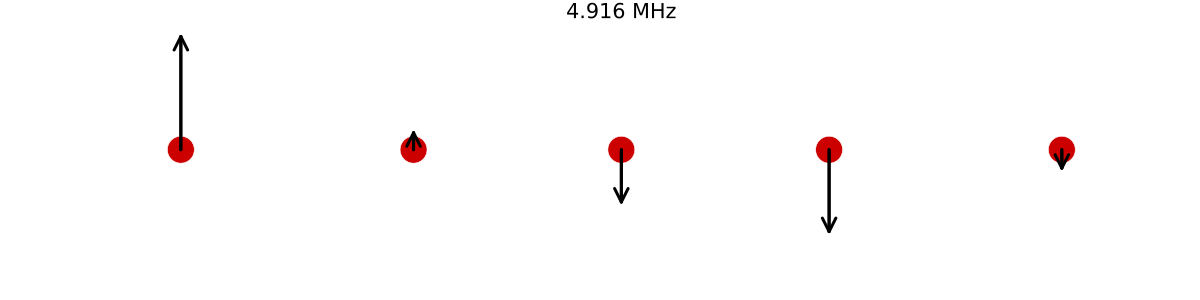

In [16]:
visualize(fnm.x[2], x̂, format="circles")

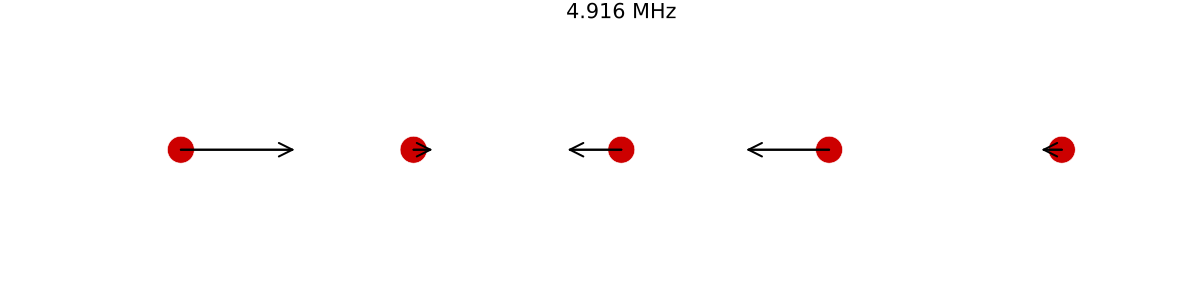

In [17]:
visualize(fnm.x[2], ẑ, format="circles")